In [1]:
from data_reader.data_reader import DataReader
from data_reader.helpers import locations
geo_data=DataReader(
    path=locations("geodata"),
    drop_domtom=True,
    insee_code=('insee',)
).content()

In [2]:
geo_data.head()

,nom,wikipedia,surf_ha,geometry
insee,,,,
2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.38510, ..."
2B137,Lano,fr:Lano,824.0,"POLYGON ((9.20010 42.39013, 9.20014 42.39014, ..."
2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
2B106,Érone,fr:Érone,393.0,"POLYGON ((9.25119 42.37605, 9.25132 42.37603, ..."
2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.28340 42.66273, 9.28345 42.66273, ..."


### Let's just have a simple check with the city names :

In [3]:
recensement=DataReader(
    path=locations("recensement"), 
    sheet_name='COM_2013',
    drop_domtom=True,
    insee_code=('CODGEO',),
    skiprows=5 # Row nb. 6 will be the columns names
).content()
recensement.columns

Index(['REG', 'REG2016', 'DEP', 'LIBGEO', 'P13_POP', 'P13_POP0014',
       'P13_POP1529', 'P13_POP3044', 'P13_POP4559', 'P13_POP6074',
       ...
       'C13_POP2554_CS8', 'C13_POP55P', 'C13_POP55P_CS1', 'C13_POP55P_CS2',
       'C13_POP55P_CS3', 'C13_POP55P_CS4', 'C13_POP55P_CS5', 'C13_POP55P_CS6',
       'C13_POP55P_CS7', 'C13_POP55P_CS8'],
      dtype='object', length=108)

In [4]:
recensement.head()

,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,P13_POP1529,P13_POP3044,P13_POP4559,P13_POP6074,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
01001,82,84,01,L'Abergement-Clémenciat,767.0,176.016667,95.383333,163.233333,149.466667,125.866667,...,0.000000,220.266667,0.0,0.000000,15.733333,3.933333,19.666667,11.800000,161.266667,7.866667
01002,82,84,01,L'Abergement-de-Varey,236.0,44.376068,35.299145,60.512821,38.324786,36.307692,...,8.068376,72.615385,0.0,0.000000,0.000000,0.000000,0.000000,8.068376,64.547009,0.000000
01004,82,84,01,Ambérieu-en-Bugey,14359.0,3049.353947,2857.742493,2771.066480,2660.372622,1794.587696,...,576.509717,3866.924234,0.0,52.911143,87.563074,183.633141,213.080703,197.206645,2874.804580,257.724948
01005,82,84,01,Ambérieux-en-Dombes,1635.0,337.300803,252.470661,324.172329,377.696109,233.282891,...,30.296479,449.397776,0.0,5.049413,25.247066,20.197653,25.247066,30.296479,313.063620,30.296479
01006,82,84,01,Ambléon,108.0,11.571429,17.357143,23.142857,26.035714,19.285714,...,7.714286,50.142857,0.0,0.000000,0.000000,7.714286,7.714286,0.000000,34.714286,0.000000


In [5]:
import pandas as pd
tmp=pd.concat([geo_data,recensement],axis=1)

In [6]:
tmp[ (tmp["nom"]!=tmp["LIBGEO"])&(~tmp["nom"].isna() & ~tmp["LIBGEO"].isna()) ].sort_values(by='P13_POP',ascending=True)

,nom,wikipedia,surf_ha,geometry,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
11232,Miraval-Cabardès,fr:Miraval-Cabardès,1261.0,"POLYGON ((2.31208 43.36897, 2.31308 43.36984, ...",91.0,76.0,11,Miraval-Cabardes,37.0,2.921053,...,3.894737,15.578947,0.000000,0.000000,0.000000,0.000000,0.000000,3.894737,11.684211,0.000000
01215,Surjoux-Lhopital,fr:Surjoux-Lhopital,807.0,"POLYGON ((5.72079 46.02700, 5.72394 46.02742, ...",82.0,84.0,01,Lhôpital,50.0,10.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,16.000000,0.000000
04120,Val-d'Oronaye,fr:Val d'Oronaye,11034.0,"POLYGON ((6.76356 44.47176, 6.76432 44.47187, ...",93.0,93.0,04,Meyronnes,57.0,7.728814,...,0.000000,30.915254,0.000000,0.000000,0.000000,3.864407,0.000000,0.000000,27.050847,0.000000
66076,Feilluns,fr:Feilluns,664.0,"POLYGON ((2.46874 42.75921, 2.47287 42.76188, ...",91.0,76.0,66,Felluns,59.0,11.279412,...,0.000000,21.691176,0.000000,8.676471,0.000000,0.000000,4.338235,4.338235,4.338235,0.000000
64182,Castillon,fr:Castillon (Canton de Lembeye),475.0,"POLYGON ((-0.15626 43.48877, -0.15617 43.48904...",72.0,75.0,64,Castillon (Canton de Lembeye),61.0,4.841270,...,0.000000,33.888889,4.841270,0.000000,0.000000,0.000000,0.000000,4.841270,19.365079,4.841270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50129,Cherbourg-en-Cotentin,fr:Cherbourg-en-Cotentin,7133.0,"MULTIPOLYGON (((-1.73765 49.64997, -1.73763 49...",25.0,28.0,50,Cherbourg-Octeville,37055.0,5953.674803,...,1888.187488,11437.637159,2.942327,125.914725,425.603491,468.461622,633.868718,385.873247,8508.068240,886.904788
59378,Marcq-en-Barœul,fr:Marcq-en-Barœul,1398.0,"POLYGON ((3.06891 50.66642, 3.06906 50.66672, ...",31.0,32.0,59,Marcq-en-Baroeul,39392.0,7603.649854,...,1330.845682,11587.020279,5.845496,265.894097,1170.092724,696.398968,543.858332,262.167728,7853.606987,789.155947
93070,Saint-Ouen-sur-Seine,fr:Saint-Ouen-sur-Seine,431.0,"POLYGON ((2.31378 48.91401, 2.31666 48.91493, ...",11.0,11.0,93,Saint-Ouen,47534.0,9558.123418,...,3261.448322,9174.224519,0.000000,205.537740,389.876745,606.736212,977.177340,621.072028,5458.941097,914.883358


In [7]:
tmp[(tmp["nom"].isna() | tmp["LIBGEO"].isna())].sort_values(by='P13_POP',ascending=False)

,nom,wikipedia,surf_ha,geometry,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
74011,NaN,NaN,NaN,None,82.0,84.0,74,Annecy-le-Vieux,20166.0,2741.653636,...,481.019189,7032.902960,6.800816,198.901992,600.745231,402.296298,336.313148,132.511433,4867.566567,487.767474
74268,NaN,NaN,NaN,None,82.0,84.0,74,Seynod,19624.0,3919.649968,...,505.820121,5613.911639,26.874409,127.457980,270.094571,415.978722,396.371044,239.113506,3852.868150,285.153256
74093,NaN,NaN,NaN,None,82.0,84.0,74,Cran-Gevrier,17493.0,3202.071058,...,550.938079,4528.753851,2.941526,88.911082,126.592837,267.830166,365.723898,252.935548,3090.719419,333.099376
50173,NaN,NaN,NaN,None,25.0,28.0,50,Équeurdreville-Hainneville,17175.0,3159.568901,...,563.873491,5115.074883,2.948191,54.488722,135.772113,254.420418,333.545485,124.254923,3840.603295,369.041737
50602,NaN,NaN,NaN,None,25.0,28.0,50,Tourlaville,15902.0,2606.378009,...,588.480873,5603.860957,8.642686,74.376269,121.047722,224.570192,374.714712,203.469842,4208.011731,389.027804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222,NaN,NaN,NaN,None,24.0,24.0,18,Sainte-Lunaise,19.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62210,NaN,NaN,NaN,None,31.0,32.0,62,Canteleux,15.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25134,NaN,NaN,NaN,None,43.0,27.0,25,Châtillon-sur-Lison,10.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
sum(tmp[(tmp["nom"].isna())].P13_POP)

968976.0

In [9]:
sum(tmp["LIBGEO"].isna())

1

In [10]:
sum(tmp.index.str.startswith('97'))

0

# Beware when coming to geographical representations !

820 towns have different names in the two databases, and while it seems to have a lot of "charset" issue (oe), there are also mergers with different names and things like that. 

There are also 1704 towns that are seen only in the recensement. This corresponds to almost 1million inhabitants !

18 towns are seen only in the geodata. It is not possible to know how many people this makes...

# First : let's plot the map of France - population for all communes borders, dots for the bigger ones

In [11]:
sum(tmp['P13_POP']>60000)

80

I did feedle a bit with the 60k threshold. This value gives the best mapping of the urban centers without having too many dots on the map.

In [12]:
tmp.dropna(inplace=True)

This removes problem with cities that fused / got removed

In [13]:
tmp = tmp.to_crs('EPSG:3395')

Now this allows to plot without warning (although in our case it wouldn't be much of an issue)

In [14]:
big_cities_coord=tmp[tmp['P13_POP']>60000].geometry.centroid

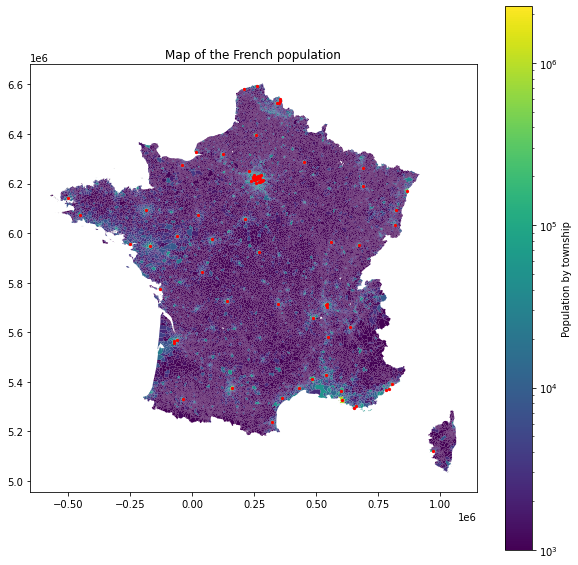

In [15]:
import matplotlib
import matplotlib.pyplot as plt
from numpy import log10


ax = tmp.plot(column='P13_POP',figsize=(10,10),edgecolor='none',legend=True,
                     norm=matplotlib.colors.LogNorm(vmin=1000, vmax=tmp.P13_POP.max()),
                     legend_kwds={'label': "Population by township"}
             ) 

big_cities_coord.plot(color='red',ax=ax,markersize=5,marker='o')
plt.title("Map of the French population")

plt.show()

,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,P13_POP1529,P13_POP3044,P13_POP4559,P13_POP6074,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
38485,82,84,38,Seyssinet-Pariset,12156.0,2090.903029,2284.872003,2315.062487,2387.281447,2010.778345,...,304.962894,3798.189190,4.778622,43.085962,262.503430,270.658015,198.337991,88.514517,2691.683900,238.626751
62826,31,32,62,Le Touquet-Paris-Plage,4475.0,378.546514,454.980162,488.408512,732.412177,1360.770432,...,99.894219,2680.680950,0.000000,84.121448,141.954943,110.409400,78.863857,15.772771,2052.249765,197.308766
71343,26,27,71,Paris-l'Hôpital,291.0,65.846715,30.799270,62.660584,52.040146,48.854015,...,0.000000,101.956204,4.248175,0.000000,4.248175,0.000000,8.496350,4.248175,80.715328,0.000000
75056,11,11,75,Paris,2229621.0,320101.628577,522244.885427,514578.741776,406469.124314,296422.260700,...,90693.547848,592848.440306,220.293206,17517.809632,85280.669574,39200.590088,38958.429726,15640.852427,347531.467751,48498.327902
81202,73,76,81,Parisot,949.0,241.491062,88.812829,267.436383,178.623554,110.766562,...,23.949527,215.545741,3.991588,7.983176,11.974763,19.957939,11.974763,3.991588,147.688749,7.983176
82137,73,76,82,Parisot,574.0,87.398340,72.831950,93.224896,106.820193,121.414661,...,4.855463,262.195020,9.710927,4.855463,4.855463,4.855463,0.000000,4.855463,218.495850,14.566390
95176,11,11,95,Cormeilles-en-Parisis,23419.0,4730.699686,4294.875106,5074.080030,4981.460608,2743.548455,...,544.760814,5779.105573,0.000000,133.071255,477.238685,444.233318,336.721475,187.076019,3891.580146,309.184675
95241,11,11,95,Fontenay-en-Parisis,1921.0,418.144536,357.249701,405.965569,414.084880,181.504331,...,36.536901,449.359788,8.119311,4.059656,28.417590,24.357934,24.357934,28.417590,307.271839,24.357934


In [17]:
geo_data[geo_data['nom'].str.contains('Paris')]

,nom,wikipedia,surf_ha,geometry
insee,,,,
38485,Seyssinet-Pariset,fr:Seyssinet-Pariset,1078.0,"POLYGON ((5.63864 45.15350, 5.63886 45.15434, ..."
71343,Paris-l'Hôpital,fr:Paris-l'Hôpital,275.0,"POLYGON ((4.62839 46.90759, 4.62841 46.90787, ..."
95176,Cormeilles-en-Parisis,fr:Cormeilles-en-Parisis,844.0,"POLYGON ((2.17335 48.95349, 2.17398 48.95391, ..."
81202,Parisot,fr:Parisot (Tarn),2871.0,"POLYGON ((1.78504 43.80676, 1.78506 43.80678, ..."
82137,Parisot,fr:Parisot (Tarn-et-Garonne),2822.0,"POLYGON ((1.81972 44.28128, 1.81976 44.28131, ..."
62826,Le Touquet-Paris-Plage,fr:Le Touquet-Paris-Plage,1528.0,"POLYGON ((1.57614 50.48773, 1.57616 50.48790, ..."
75056,Paris,fr:Paris,10539.0,"POLYGON ((2.22412 48.85420, 2.22416 48.85461, ..."
95241,Fontenay-en-Parisis,fr:Fontenay-en-Parisis,1102.0,"POLYGON ((2.41128 49.05330, 2.41333 49.05611, ..."


In [18]:
geo_data[geo_data['nom'].str.contains('ondiss')]

,nom,wikipedia,surf_ha,geometry
insee,,,,
